In [1]:
#Data Manipulation
import pandas as pd

#Computing
import numpy as np 

#Plotting
import matplotlib.pyplot as plt
import seaborn as sns

#Modeling 
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

#Write to file
import pickle

In [3]:
df = pd.read_csv('heart_2020_cleaned.csv')

In [4]:
df.shape

(319795, 18)

In [5]:
df.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

- The dataset consists of **`319,795`** rows & **`18`** columns 
- The dataset does not contain any missing values 
- There are **14** Categorial features & **4** Numerical features

**Categorical:**

- `HeartDisease` : Whether person has a heart disease (Target Variable)

- `Smoking` : Whether person has smoked 100 cigarettes in their lifetime 

- `AlcoholDrinking` : Whether person has participated in heavy drinking in the past week (Male > 14 drinks, Female > 7 drinks)

- `Stroke` : If person has ever suffered from a stroke 

- `DiffWalking` : If person has difficulty walking or climbing stairs 

- `Sex` : Male or Female ? 

- `AgeCategory` : Which age bracket does person belong to ? 

- `Race` : Person's Race

- `Diabetic` : If the person is diabetic 

- `PhysicalActivity` : If person has performed exercise in the past 30 days

- `GenHealth` : Description of person's general health

- `Asthma` : If the person has asthma

- `KidneyDisease` : If person has/had kidney disease

- `SkinCancer` : If person has/had skin cancer 

**Numerical:**

- `BMI` : Body Mass Index 

- `PhysicalHealth` : How many days in the past 30 days have you exercised ? 

- `MentalHealth` : How many days in the past 30 days has your mental health NOT been good ? 

- `SleepTime` : How much sleep do you receive ? 


In [8]:
#Finding unique values for each categorical feature
cat_cols = df.select_dtypes(include=['object']).columns
for i in cat_cols:
    print(i ,':',df[i].unique(),'\n')

HeartDisease : ['No' 'Yes'] 

Smoking : ['Yes' 'No'] 

AlcoholDrinking : ['No' 'Yes'] 

Stroke : ['No' 'Yes'] 

DiffWalking : ['No' 'Yes'] 

Sex : ['Female' 'Male'] 

AgeCategory : ['55-59' '80 or older' '65-69' '75-79' '40-44' '70-74' '60-64' '50-54'
 '45-49' '18-24' '35-39' '30-34' '25-29'] 

Race : ['White' 'Black' 'Asian' 'American Indian/Alaskan Native' 'Other'
 'Hispanic'] 

Diabetic : ['Yes' 'No' 'No, borderline diabetes' 'Yes (during pregnancy)'] 

PhysicalActivity : ['Yes' 'No'] 

GenHealth : ['Very good' 'Fair' 'Good' 'Poor' 'Excellent'] 

Asthma : ['Yes' 'No'] 

KidneyDisease : ['No' 'Yes'] 

SkinCancer : ['Yes' 'No'] 



Most of the categorical features have 2 unique values with **Yes/No** values, apart from `GenHealth` ,`Diabetic` ,`Race`, `AgeCategory`, and `Gender`.

In [9]:
#Label encode most of them 
#One hot encode gender, race

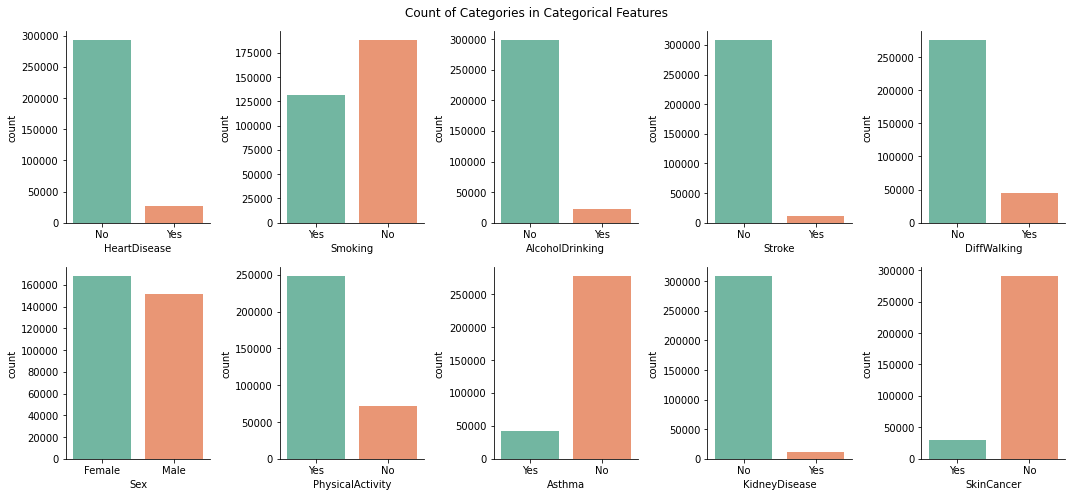

In [10]:
viz_1 = ['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking','Sex', 'PhysicalActivity', 'Asthma', 'KidneyDisease', 'SkinCancer']
plt.figure(figsize=(15, 7))
for i, col in enumerate(viz_1) : 
    ax = plt.subplot(2,5, i+1)
    sns.countplot(data = df,x = col, ax = ax, palette = 'Set2')
    sns.despine(right=True)
plt.suptitle('Count of Categories in Categorical Features')
plt.tight_layout()

- A large proportion of our data DOES NOT have a heart disease 
- Large percentage of data did not drink heavily in the past month
- There are slightly more Females than Males 
- Large percentage of data report not having Asthma, Kidney Disease, Skin Cancer, Stroke
- Large percentage of data have performed physical activity in the past month 

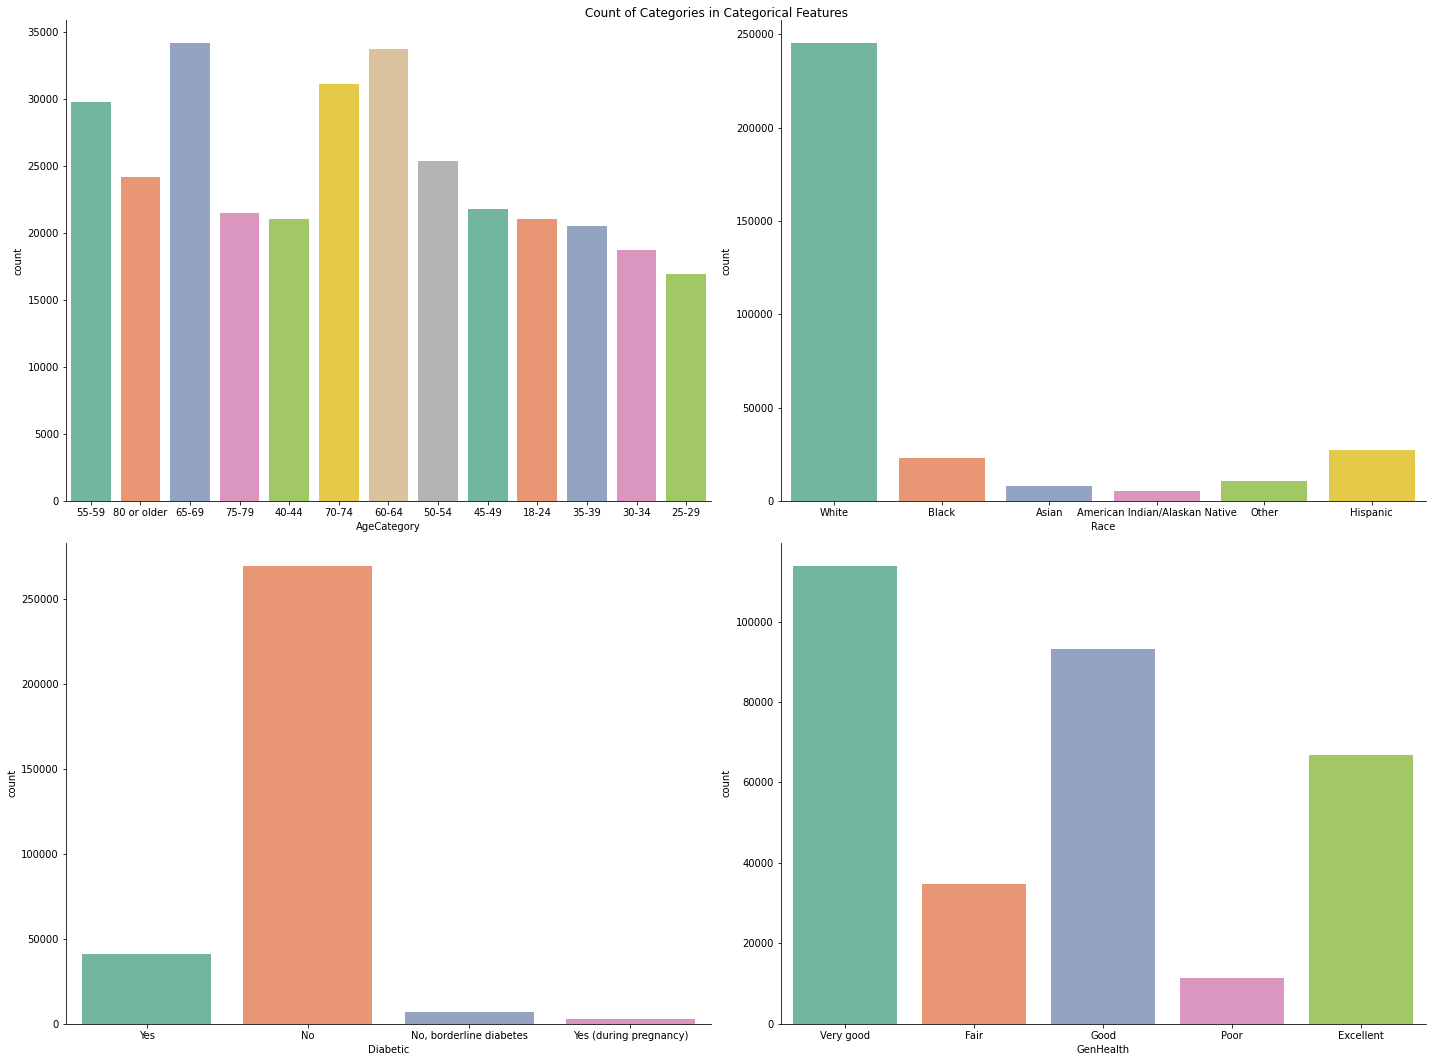

In [11]:
viz_2 = ['AgeCategory', 'Race', 'Diabetic','GenHealth']
plt.figure(figsize=(20, 15))
for i, col in enumerate(viz_2) : 
    ax = plt.subplot(2,2, i+1)
    sns.countplot(data = df,x = col, ax = ax, palette = 'Set2')
    sns.despine(right=True)
plt.suptitle('Count of Categories in Categorical Features')
plt.tight_layout()

- The Age bracket that is most common in the data is the ``65-69`` , followed by ``60-64``, then followed by ``70-74``. Roughly a third of the data covers people who aged between 60-74.

- A large proportion of the data is White, followed by Hispanic, then Black. 

- A large proportion of the data does not have diabetes. 

- For the most part, people report that they are in good to excellent general health, with a small proportion of data reporting poor general health.

In [12]:
df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


On **average** a person has :
- A BMI of 28
- Has exercised 3 days in the past month 
- Has had 3 bad mental health days
- Sleeps for about 7 hours a night 

In [13]:
#Gets all features with float types
num_cols = df.select_dtypes(include=['float']).columns

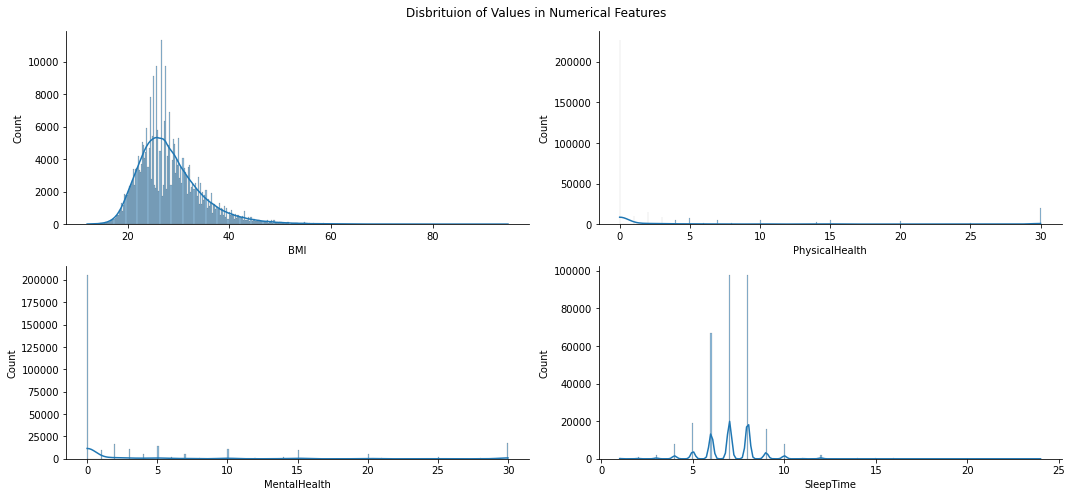

In [14]:
#Histogram of Numerical Features
plt.figure(figsize=(15, 7))
for i, col in enumerate(num_cols) : 
    ax = plt.subplot(2,2, i+1)
    sns.histplot(data=df, x=col,ax = ax, kde=True)
    sns.despine(right=True)
plt.suptitle('Disbrituion of Values in Numerical Features')
plt.tight_layout()

- A large proportion of BMI values fall between 20 - 40
- Many individuals reported having 0 bad mental health days with some reporting 30 bad days 
- Most users reported having 6 to 8 hours of sleep 

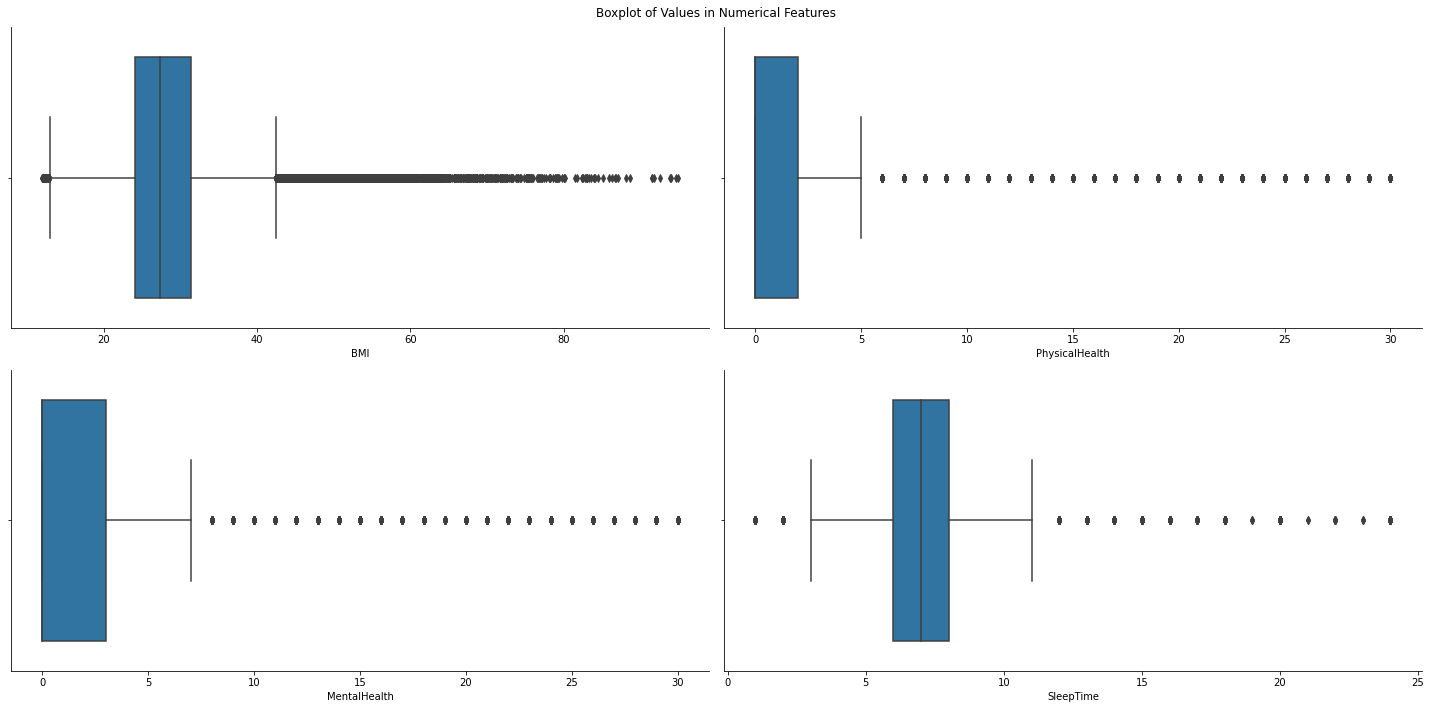

In [15]:
#Boxplot of Numerical Features 
plt.figure(figsize=(20, 10))
for i, col in enumerate(num_cols) : 
    ax = plt.subplot(2,2, i+1)
    sns.boxplot(data=df, x=col,ax = ax)
    sns.despine(right=True)

plt.suptitle('Boxplot of Values in Numerical Features')
plt.tight_layout()

- There are many outliers in all numerical features. Especially in the `BMI` feature. 
- There are some people who sleep more than 20 hours a day, which is crazy. Thats the whole day. 
- On the other hand, there are some people who only sleep 1-3 hours a day. 
- A BMI of greater than or equal to 30 is considered obese. There is a large number of people who have a BMI of greater than 40.

### Exploratary Data Analysis

In [16]:
has_HeartDisease = df['HeartDisease'].value_counts()[1]
no_HeartDisease = df['HeartDisease'].value_counts()[0]

#### General Health vs. Heart Disease

In [17]:
#Of people with excellent general health, how many of them have heart disease ? 
excellentHealth_HeartDisease = df.loc[(df['GenHealth'] == 'Excellent') & ((df['HeartDisease'] == 'Yes'))]

#Of people with poor general health, how many of them have heart disease ? 
poorHealth_HeartDisease = df.loc[(df['GenHealth'] == 'Poor') & ((df['HeartDisease'] == 'Yes'))]

#Of people with poor general health, how many of them do not have heart disease ? 
poorHealth_noHeartDisease = df.loc[(df['GenHealth'] == 'Poor') & ((df['HeartDisease'] == 'No'))]

In [18]:
#Of the people with heart disease, how much of them said they were in excellent general health 
print('Excellent Health w/ Heart Disease : ',((excellentHealth_HeartDisease.shape[0]/has_HeartDisease) * 100))

#Of the people with heart disease, how much of them said they were in poor general health 
print('Poor Health w/ Heart Disease : ',((poorHealth_HeartDisease.shape[0]/has_HeartDisease) * 100))

#Of the people with no heart disease, how much of them said they were in poor general health 
print('Poor Health w/o Heart Disease : ',((poorHealth_noHeartDisease.shape[0]/no_HeartDisease) * 100))

Excellent Health w/ Heart Disease :  5.479852409308442
Poor Health w/ Heart Disease :  14.064954517225004
Poor Health w/o Heart Disease :  2.5439262435794845


- `5.5%` of people who have Heart conditions, reported that they were in **excellent** general health
- `14%` of people who have Heart conditions, reported that they were in **poor** general health
- Of the people **without** a Heart condition, `2.5%` of them reported a **poor** general health

#### Diabetic vs. Heart Disease

In [19]:
#Of people who are diabetic, how many of them have heart disease ? 
diabetic_HeartDisease = df.loc[(df['Diabetic'] == 'Yes') & (df['HeartDisease'] == 'Yes')]

#Of people who are diabetic, how many of them do not have heart disease ? 
diabetic_noHeartDisease = df.loc[(df['Diabetic'] == 'Yes') & (df['HeartDisease'] == 'No')]

In [20]:
#Of the people with heart disease, how much of them are diabetic 
print('Diabetic w/ Heart Disease : ',(diabetic_HeartDisease.shape[0]/has_HeartDisease) * 100)

#Of the people without heart disease, how much of them are diabetic 
print('Diabetic w/o Heart Disease : ',(diabetic_noHeartDisease.shape[0]/no_HeartDisease) * 100)

Diabetic w/ Heart Disease :  32.722025353450476
Diabetic w/o Heart Disease :  10.890083509448674


- `32.7` % of people who a Heart condition, also have **Diabetes**

#### Race vs. Heart Disease

In [21]:
#Creating a groupby table grouped by Race if person has Heart Disease 
races_HeartDisease = pd.DataFrame(df.groupby(['Race']).apply(
    lambda x: x[x['HeartDisease'] == 'Yes']['HeartDisease'].count()))

#Creating a groupby table grouped by Race if person does not have Heart Disease 
races_noHeartDisease = pd.DataFrame(df.groupby(['Race']).apply(
    lambda x: x[x['HeartDisease'] == 'No']['HeartDisease'].count()))

#Creating a groupby for the count of people from each race
races_count = pd.DataFrame(df.groupby(['Race'])['HeartDisease'].count())

In [22]:
#Joining all groupby tables into one table
races_pivot = pd.concat([races_count,races_HeartDisease,races_noHeartDisease],axis=1).reset_index()
races_pivot.columns = ['Race','Count','has_HeartDisease','no_HeartDisease']
races_pivot = races_pivot.sort_values('Count',ascending = False)

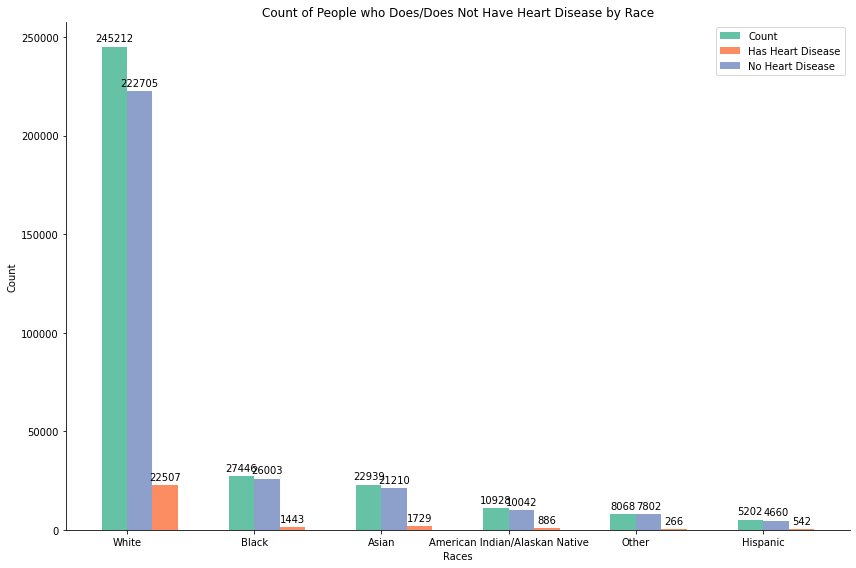

In [23]:
#Labels for each bar 
labels = ['White', 'Black', 'Asian', 'American Indian/Alaskan Native', 'Other', 'Hispanic']

x = np.arange(len(labels)) #Setting number of bins 
width = 0.2  #Width between the bars

fig, ax = plt.subplots(figsize=(12,8))

#Setting up a bar for each category 
rects1 = ax.bar(x - width/2, races_pivot['Count'], width, label='Count', color = '#66c2a5')
rects2 = ax.bar(x + width+0.1, races_pivot['has_HeartDisease'], width, label='Has Heart Disease', color = '#fc8d62')
rects3 = ax.bar(x + width/2, races_pivot['no_HeartDisease'], width, label='No Heart Disease', color = '#8da0cb')

#X-Axis 
ax.set_xlabel('Races')
ax.set_xticks(x, labels)

#Y-Axis
ax.set_ylabel('Count')

#Title & Legend
ax.set_title('Count of People who Does/Does Not Have Heart Disease by Race')
ax.legend()

#Remove Spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

#Labeling each bar with value 
ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)
ax.bar_label(rects3, padding=3)

fig.tight_layout()

plt.show()

In [24]:
#Getting a percentage of people who have heart disease in that race 
#To see of which race has the highest rate of heart conditions
races_pivot['percentage_HeartDisease'] = races_pivot['has_HeartDisease'] / races_pivot['Count'] * 100
races_pivot[['Race','Count','has_HeartDisease','percentage_HeartDisease']]

,Race,Count,has_HeartDisease,percentage_HeartDisease
5,White,245212,22507,9.178588
3,Hispanic,27446,1443,5.257597
2,Black,22939,1729,7.537382
4,Other,10928,886,8.107613
1,Asian,8068,266,3.296976
0,American Indian/Alaskan Native,5202,542,10.419070


- Of all the **American Indian/Alaskan Native** people in this data, ``10.4%`` of them have a Heart condition
- ``9.17%`` of **White** people have a Heart condition
- ``3.29%`` of **Asian** people have a Heart condition

#### Age vs. Heart Disease

In [25]:
#Count of those with Heart Disease in each age category
age_HeartDisease = pd.DataFrame(df.groupby(['AgeCategory']).apply(
    lambda x: x[x['HeartDisease'] == 'Yes']['HeartDisease'].count())).reset_index()

age_HeartDisease.columns = ['AgeCategory','Count']
age_HeartDisease = age_HeartDisease.sort_values('AgeCategory',ascending = False)

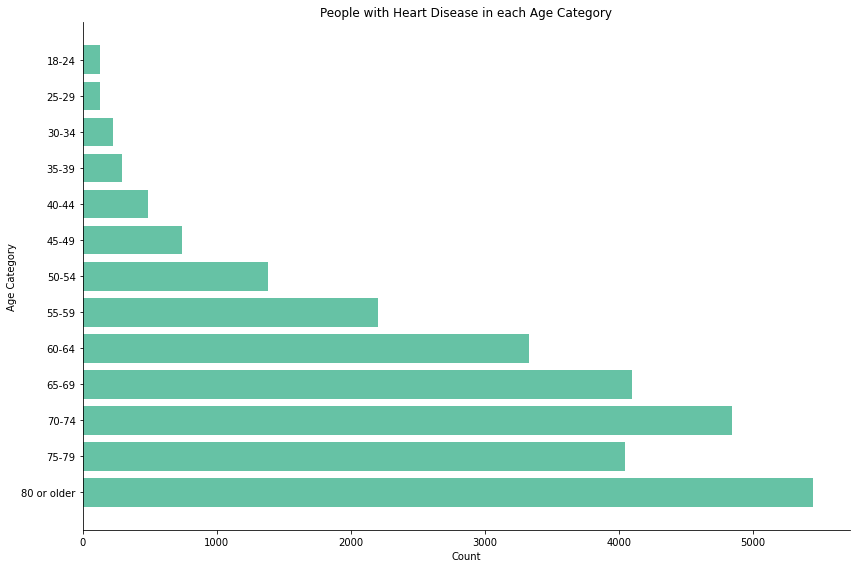

In [26]:
fig, ax = plt.subplots(figsize=(12,8))
plt.barh(age_HeartDisease['AgeCategory'],age_HeartDisease['Count'],color = '#66c2a5')

#Y-Axis
ax.set_ylabel('Age Category')

#X-Axis
ax.set_xlabel('Count')

#Title
ax.set_title('People with Heart Disease in each Age Category')

#Spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

fig.tight_layout()
plt.show()

- This graph shows that for the most part as the age category increases, there are more people with a Heart disease.
- The age category `75-79` take a dip in numbers but increases greatly for the `80 or older` category.

#### Smoking & Drinking vs. Heart Disease

In [27]:
#People who have smoked more than 5 packs of cigarettes 
smokers = df.loc[(df['Smoking']) == 'Yes']
#People who smoke and have heart disease 
smoke_HeartDisease = df.loc[(df['Smoking'] == 'Yes') & (df['HeartDisease'] == 'Yes')]
#People who smoke and DO NOT have heart disease 
smoke_noHeartDisease = df.loc[(df['Smoking'] == 'Yes') & (df['HeartDisease'] == 'No')]

#People who have participated in heavy alcohol consumption recently
drinkers = df.loc[(df['AlcoholDrinking'] == 'Yes')]
#People who drink and have heart disease
drink_HeartDisease = df.loc[(df['AlcoholDrinking'] == 'Yes') & (df['HeartDisease'] == 'Yes')]
#People who drink and DO NOT have heart disease
drink_noHeartDisease = df.loc[(df['AlcoholDrinking'] == 'Yes') & (df['HeartDisease'] == 'No')]

#People who smoke and drink heavily 
smokers_drinkers = df.loc[(df['Smoking'] == 'Yes') & (df['AlcoholDrinking'] == 'Yes')]
#People who drink, smoke and have heart disease 
smoke_drink_HeartDisease = df.loc[((df['AlcoholDrinking'] == 'Yes') & (df['Smoking'] == 'Yes')) 
                                  & (df['HeartDisease'] == 'Yes')]
#People who drink, smoke and DO NOT have heart disease 
smoke_drink_noHeartDisease = df.loc[((df['AlcoholDrinking'] == 'Yes') & (df['Smoking'] == 'Yes')) 
                                  & (df['HeartDisease'] == 'No')]

#People who do not smoke or drink
no_smoke_drink = df.loc[(df['Smoking'] == 'No') & (df['AlcoholDrinking'] == 'No')]
#People who do not drink or smoke, yet they have a heart disease
no_smoke_drink_HeartDisease = df.loc[((df['AlcoholDrinking'] == 'No') & (df['Smoking'] == 'No')) 
                                  & (df['HeartDisease'] == 'Yes')]

In [28]:
print('SMOKERS')
print('Count :', len(smokers)) 
print('Percentage of Population : ',len(smokers)/len(df) * 100)
print('Smoke w/ Heart Disease : ', len(smoke_HeartDisease)/len(smokers) * 100)
print('---------------------------------------------')
print('DRINKERS')
print('Count :', len(drinkers)) 
print('Percentage of Population : ',len(drinkers)/len(df) * 100)
print('Drink w/ Heart Disease : ', len(drink_HeartDisease)/len(drinkers) * 100)

SMOKERS
Count : 131908
Percentage of Population :  41.24767429134289
Smoke w/ Heart Disease :  12.157715983867543
---------------------------------------------
DRINKERS
Count : 21777
Percentage of Population :  6.809674948013571
Drink w/ Heart Disease :  5.239472838315654


**SMOKING** 
- `41%` of people in this dataset have smoked more than 5 pack of cigarettes in their lifetime.
- Of people who smoke, `12%` of them have a Heart disease. 

**DRINKING**
- `6.8%` of people have consumed a large amount of alcohol recently.
- Of the people who have been drinking heavily, `5.23%` of them have a Heart Disease. 

It seems like if you smoke, there is a higher likelihood of contracting a heart disease compared to heavy drinking. 

In [29]:
print('SMOKERS & DRINKERS')
print('Count :', len(smokers_drinkers)) 
print('Percentage of Population : ',len(smokers_drinkers)/len(df) * 100)
print('Drink & Smoke w/ Heart Disease : ', len(smoke_drink_HeartDisease)/len(smokers_drinkers) * 100)
print('---------------------------------------------')
print('NON SMOKER & NON DRINKER')
print('Count :', len(no_smoke_drink_HeartDisease))
print('Percentage of Population : ',len(no_smoke_drink_HeartDisease)/len(df) * 100)
print('No Drink & Smoke w/ Heart Disease : ', len(no_smoke_drink_HeartDisease)/len(no_smoke_drink) * 100)

SMOKERS & DRINKERS
Count : 13415
Percentage of Population :  4.194874841695461
Drink & Smoke w/ Heart Disease :  6.6343645173313455
---------------------------------------------
NON SMOKER & NON DRINKER
Count : 11085
Percentage of Population :  3.4662830876029957
No Drink & Smoke w/ Heart Disease :  6.174627489207631


**SMOKERS & DRINKERS**
- Only `4.2%` of people have participated in both. 
- People who drink and smoke, `6.6%` of them have a heart disease. 

**NON-SMOKERS & NON-DRINKERS**
- Of the entire dataset, there are `3.47%` of people who do not drink heavily or smoked more than 100 cigarettes. 
- However, of those people who do not drink or smoke, `6.17%` have a heart disease. 

It seems like a similar amount of people contract heart disease whether they drink and smoke or if they do not participate in either. 

#### Race vs. Alcohol Drinking

In [30]:
#Groupby table of Race with Drinking = Yes
race_drinkers = pd.DataFrame(df.groupby(['Race']).apply(
    lambda x: x[x['AlcoholDrinking'] == 'Yes']['HeartDisease'].count()))
#Groupby table of Race with Drinking = No
race_noDrinkers = pd.DataFrame(df.groupby(['Race']).apply(
    lambda x: x[x['AlcoholDrinking'] == 'No']['HeartDisease'].count()))

In [31]:
#Joining all groupby tables into one table
drinking_race_pivot = pd.concat([race_drinkers,race_noDrinkers],axis=1).reset_index()
drinking_race_pivot.columns = ['Race','Drinkers','NonDrinkers']
drinking_race_pivot['percentage_drinkers'] = (drinking_race_pivot['Drinkers'] / (drinking_race_pivot['Drinkers']
                                            + drinking_race_pivot['NonDrinkers'])) * 100

In [32]:
drinking_race_pivot

,Race,Drinkers,NonDrinkers,percentage_drinkers
0,American Indian/Alaskan Native,311,4891,5.978470
1,Asian,268,7800,3.321765
2,Black,1022,21917,4.455294
3,Hispanic,1518,25928,5.530861
4,Other,824,10104,7.540264
5,White,17834,227378,7.272890


- The largest percentage of heavy drinkers are people who are `White` and `Other`
- Lowest percentages of heavy drinkers are people who are `Asian` and `Black`

#### Race vs. Smoking

In [33]:
#Groupby table of Race with Smoking = Yes
race_smokers = pd.DataFrame(df.groupby(['Race']).apply(
    lambda x: x[x['Smoking'] == 'Yes']['HeartDisease'].count()))
#Groupby table of Race with Smoking = No
race_noSmokers = pd.DataFrame(df.groupby(['Race']).apply(
    lambda x: x[x['Smoking'] == 'No']['HeartDisease'].count()))

In [34]:
#Joining all groupby tables into one table
smoking_race_pivot = pd.concat([race_smokers,race_noSmokers],axis=1).reset_index()
smoking_race_pivot.columns = ['Race','Smoker','NonSmoker']
smoking_race_pivot['percentage_smokers'] = (smoking_race_pivot['Smoker'] / (smoking_race_pivot['Smoker']
                                            + smoking_race_pivot['NonSmoker'])) * 100

In [35]:
smoking_race_pivot

,Race,Smoker,NonSmoker,percentage_smokers
0,American Indian/Alaskan Native,2856,2346,54.901961
1,Asian,1839,6229,22.793753
2,Black,7908,15031,34.474040
3,Hispanic,8372,19074,30.503534
4,Other,4971,5957,45.488653
5,White,105962,139250,43.212404


- `54.9%`, more than half of American Indians smoke
- Only `22.8%` of Asians are smokers

#### Age Category vs. Drinking & Smoking

In [36]:
#Groupby table of Race with Smoking = Yes
age_drinkers = pd.DataFrame(df.groupby(['AgeCategory']).apply(
    lambda x: x[x['AlcoholDrinking'] == 'Yes']['HeartDisease'].count()))
#Groupby table of Race with Smoking = No
age_noDrinkers = pd.DataFrame(df.groupby(['AgeCategory']).apply(
    lambda x: x[x['AlcoholDrinking'] == 'No']['HeartDisease'].count()))

In [37]:
#Joining all groupby tables into one table
drinker_age_pivot = pd.concat([age_drinkers,age_noDrinkers],axis=1).reset_index()
drinker_age_pivot.columns = ['Age','Drinker','NonDrinker']
drinker_age_pivot['percentage_drinkers'] = (drinker_age_pivot['Drinker'] / (drinker_age_pivot['Drinker']
                                            + drinker_age_pivot['NonDrinker'])) * 100
drinker_age_pivot = drinker_age_pivot.sort_values('Age',ascending = True)

In [38]:
#Groupby table of Race with Smoking = Yes
age_smokers = pd.DataFrame(df.groupby(['AgeCategory']).apply(
    lambda x: x[x['Smoking'] == 'Yes']['HeartDisease'].count()))
#Groupby table of Race with Smoking = No
age_noSmokers = pd.DataFrame(df.groupby(['AgeCategory']).apply(
    lambda x: x[x['Smoking'] == 'No']['HeartDisease'].count()))

In [39]:
#Joining all groupby tables into one table
smoking_age_pivot = pd.concat([age_smokers,age_noSmokers],axis=1).reset_index()
smoking_age_pivot.columns = ['Age','Smoker','NonSmoker']
smoking_age_pivot['percentage_smokers'] = (smoking_age_pivot['Smoker'] / (smoking_age_pivot['Smoker']
                                            + smoking_age_pivot['NonSmoker'])) * 100
smoking_age_pivot = smoking_age_pivot.sort_values('Age',ascending = True)

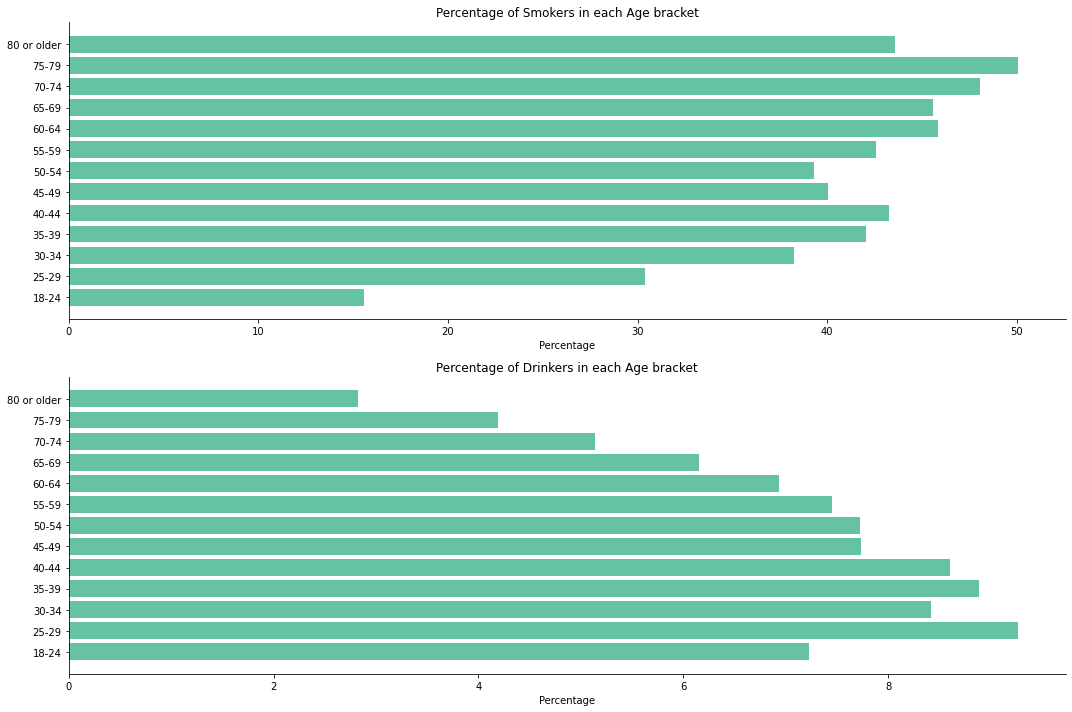

In [40]:
fig, ax = plt.subplots(2,1,figsize=(15,10))
#Smokers
ax[0].barh(smoking_age_pivot['Age'],smoking_age_pivot['percentage_smokers'],color = '#66c2a5')
ax[0].set_title('Percentage of Smokers in each Age bracket')
ax[0].set_xlabel('Percentage')
#Spines
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)

#Drinkers
ax[1].barh(drinker_age_pivot['Age'],drinker_age_pivot['percentage_drinkers'],color = '#66c2a5')
ax[1].set_title('Percentage of Drinkers in each Age bracket')
ax[1].set_xlabel('Percentage')
#Spines
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

#### Stroke vs. Heart Disease

In [41]:
#People who have suffered a stroke
stroke_num = df['Stroke'].value_counts()[1]

In [42]:
#People with a stroke and heart disease
stroke_HeartDisease = df.loc[(df['Stroke'] == 'Yes') & (df['HeartDisease'] == 'Yes')]

In [43]:
print('Stroke w/ Heart Disease : ', len(stroke_HeartDisease) / stroke_num * 100)

Stroke w/ Heart Disease :  36.36589609743972


- `36.3%` of people who have suffered from a stroke, also have a Heart condition. 

#### Asthma vs. Heart Disease

In [44]:
asthma_num = df['Asthma'].value_counts()[1]

In [45]:
asthma_HeartDisease = df.loc[(df['Asthma'] == 'Yes') & (df['HeartDisease'] == 'Yes')]

In [46]:
print('Asthma w/ Heart Disease : ', len(asthma_HeartDisease) / asthma_num * 100)

Asthma w/ Heart Disease :  11.506344467251353


- Of people with Heart disease, `11.5%` have Asthma. 

#### Physical Activity vs. Heart Disease

In [47]:
phys_yes = df['PhysicalActivity'].value_counts()[0]
phys_no = df['PhysicalActivity'].value_counts()[1]

In [48]:
physNo_HeartDisease = df.loc[(df['PhysicalActivity'] == 'No') & (df['HeartDisease'] == 'Yes')]
physYes_HeartDisease = df.loc[(df['PhysicalActivity'] == 'Yes') & (df['HeartDisease'] == 'Yes')]

In [49]:
#Percentage of people who have heart disease with doing physical activity 
print('No Physical Activity w/ Heart Disease : ',len(physNo_HeartDisease) / phys_no * 100)

#Percentage of people who have heart disease with doing NOT physical activity 
print('Physical Activity w/ Heart Disease : ', len(physYes_HeartDisease) / phys_yes * 100)

No Physical Activity w/ Heart Disease :  13.758734931373368
Physical Activity w/ Heart Disease :  7.053239069677404


- Of the people with no physical activity, `13.75%` of them have a heart disease. 
- People who had regular physical activity, only `7.05%` of them have heart diseases. 

#### Gender vs. Heart Disease 

In [50]:
#Group by table of Gender w/ Heart Disease 
gender_HeartDisease = pd.DataFrame(df.groupby(['Sex']).apply(
    lambda x: x[x['HeartDisease'] == 'Yes']['HeartDisease'].count()))
#Group by table of Gender w/o Heart Disease 
gender_noHeartDisease = pd.DataFrame(df.groupby(['Sex']).apply(
    lambda x: x[x['HeartDisease'] == 'No']['HeartDisease'].count()))
#Groupby of Gender Count
gender_count = pd.DataFrame(df.groupby(['Sex'])['HeartDisease'].count())

In [51]:
#Joining all groupby tables into one table
gender_pivot = pd.concat([gender_count,gender_HeartDisease,gender_noHeartDisease],axis=1).reset_index()
gender_pivot.columns = ['Gender','Count','has_HeartDisease','no_HeartDisease']
gender_pivot = gender_pivot.sort_values('Count',ascending = False)

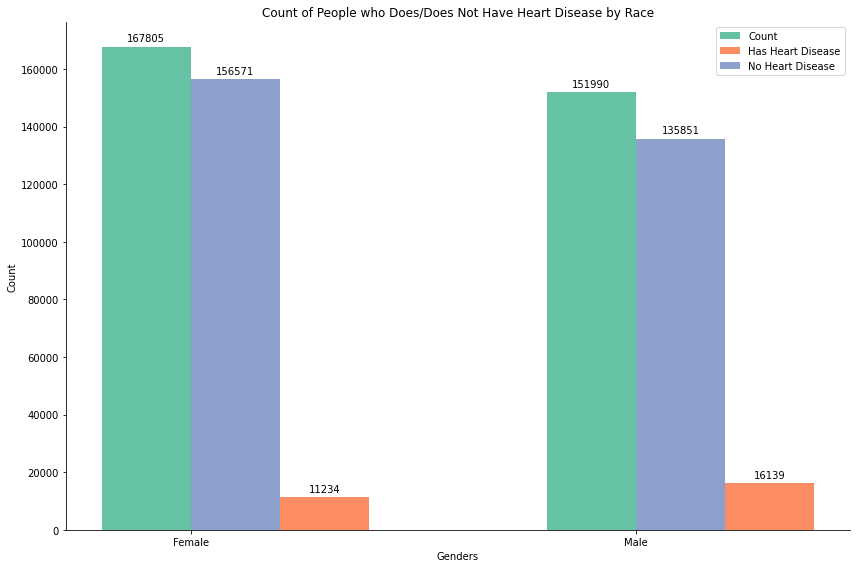

In [52]:
#Labels for each bar 
labels = ['Female','Male']

x = np.arange(len(labels)) #Setting number of bins 
width = 0.2  #Width between the bars

fig, ax = plt.subplots(figsize=(12,8))

#Setting up a bar for each category 
rects1 = ax.bar(x - width/2, gender_pivot['Count'], width, label='Count', color = '#66c2a5')
rects2 = ax.bar(x + width+0.1, gender_pivot['has_HeartDisease'], width, label='Has Heart Disease', color = '#fc8d62')
rects3 = ax.bar(x + width/2, gender_pivot['no_HeartDisease'], width, label='No Heart Disease', color = '#8da0cb')

#X-Axis 
ax.set_xlabel('Genders')
ax.set_xticks(x, labels)

#Y-Axis
ax.set_ylabel('Count')

#Title & Legend
ax.set_title('Count of People who Does/Does Not Have Heart Disease by Race')
ax.legend()

#Remove Spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

#Labeling each bar with value 
ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)
ax.bar_label(rects3, padding=3)

fig.tight_layout()

plt.show()

- There are more Females compared to Males in this dataset
- More Males suffer from Heart disease, `16,139` Men while `11234` Women have Heart disease.

In [53]:
gender_smoking = pd.DataFrame(df.groupby(['Sex']).apply(
    lambda x: x[x['Smoking'] == 'Yes']['HeartDisease'].count()))

gender_drinking = pd.DataFrame(df.groupby(['Sex']).apply(
    lambda x: x[x['AlcoholDrinking'] == 'Yes']['HeartDisease'].count()))

gender_obese = pd.DataFrame(df.groupby(['Sex']).apply(
    lambda x: x[x['BMI'] >= 40]['HeartDisease'].count()))

gender_diabetic = pd.DataFrame(df.groupby(['Sex']).apply(
    lambda x: x[x['Diabetic'] == 'Yes']['HeartDisease'].count()))

gender_asthma = pd.DataFrame(df.groupby(['Sex']).apply(
    lambda x: x[x['Asthma'] == 'Yes']['HeartDisease'].count()))

gender_stroke = pd.DataFrame(df.groupby(['Sex']).apply(
    lambda x: x[x['Stroke'] == 'Yes']['HeartDisease'].count()))

gender_pivot2 = pd.concat([gender_smoking,gender_drinking,gender_obese,gender_diabetic,gender_asthma,gender_stroke]
                          ,axis=1).reset_index()
gender_pivot2.columns = ['Gender','Smokers','Drinkers','BMI>40','Diabetic','Asthma','Stroke']

In [54]:
#Female Data Values in list form for bar chart 
female_vals = gender_pivot2.iloc[0].values.flatten().tolist()
female_vals = female_vals[1:]

#Male Data Values in list form for bar chart 
male_vals = gender_pivot2.iloc[1].values.flatten().tolist()
male_vals = male_vals[1:]

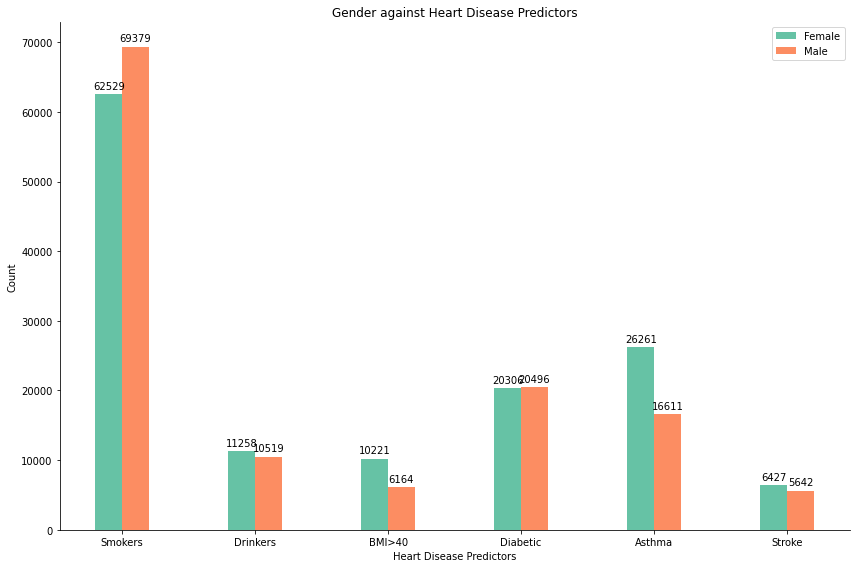

In [55]:
#Labels for each bar 
labels = ['Smokers','Drinkers','BMI>40','Diabetic','Asthma','Stroke']

x = np.arange(len(labels)) #Setting number of bins 
width = 0.2  #Width between the bars

fig, ax = plt.subplots(figsize=(12,8))

#Setting up a bar for each category 
rects1 = ax.bar(x - width/2, female_vals, width, label='Female', color = '#66c2a5')
rects2 = ax.bar(x + width/2, male_vals, width, label='Male', color = '#fc8d62')

#X-Axis 
ax.set_xlabel('Heart Disease Predictors')
ax.set_xticks(x, labels)

#Y-Axis
ax.set_ylabel('Count')

#Title & Legend
ax.set_title('Gender against Heart Disease Predictors')
ax.legend()

#Remove Spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

#Labeling each bar with value 
ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

- Females have higher frequencies in all features except for `Smoking` and `Diabetic`.
- There is a large difference between the number of Males and Females that smoke.
- Features such as `BMI>40` & `Asthma` see a lot more Females than Males in these categories.
- The `Diabetic` feature seems to have an even spread between Males and Females.

#### BMI vs. Sleep Time, Physical Health, Mental Health

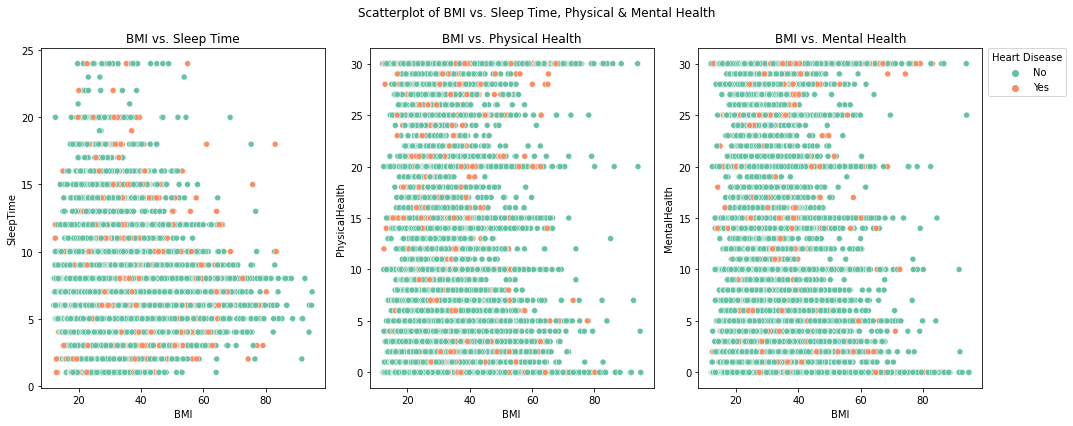

In [56]:
#Scatter Plot of BMI vs. Sleep Time, Physical Health, Mental Health
fig, axes = plt.subplots(1,3, figsize=(15,6))
color = sns.color_palette("Set2",2)
#Plot 1
sns.scatterplot(ax = axes[0], x = df['BMI'], y = df['SleepTime'], hue = df['HeartDisease'], palette = color, legend = False)
axes[0].set_title('BMI vs. Sleep Time')

#Plot 2 
sns.scatterplot(ax = axes[1], x = df['BMI'] , y = df['PhysicalHealth'], hue = df['HeartDisease'], palette = color, legend = False)
axes[1].set_title('BMI vs. Physical Health')

#Plot 3 
sns.scatterplot(ax = axes[2], x = df['BMI'], y = df['MentalHealth'], hue = df['HeartDisease'], palette = color)
axes[2].set_title('BMI vs. Mental Health')
axes[2].legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, title = 'Heart Disease')

plt.suptitle('Scatterplot of BMI vs. Sleep Time, Physical & Mental Health')
plt.tight_layout()
plt.show()

#### BMI vs. Physical Health, Mental Health

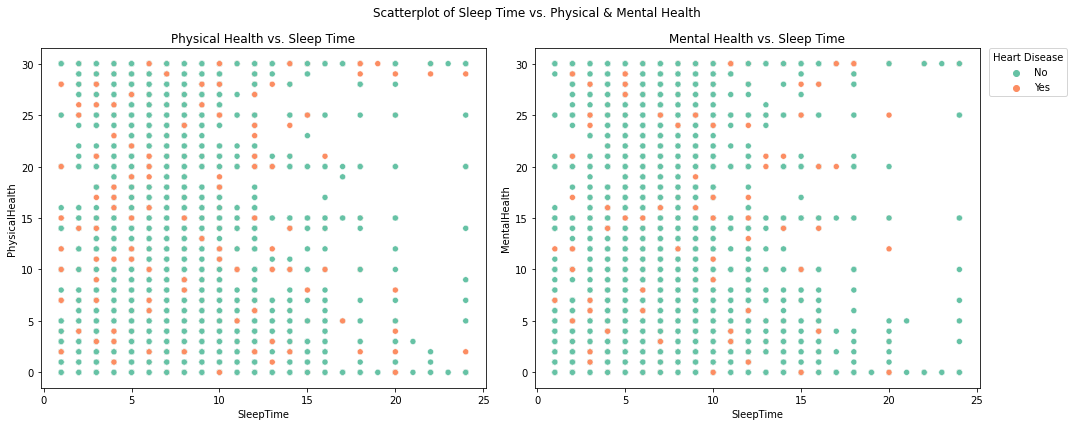

In [57]:
#Scatter Plot of BMI vs. Physical Health, Mental Health
fig, axes = plt.subplots(1,2, figsize=(15,6))
color = sns.color_palette("Set2",2)
#Plot 1
sns.scatterplot(ax = axes[0], x = df['SleepTime'], y = df['PhysicalHealth'], hue = df['HeartDisease'], palette = color, legend = False)
axes[0].set_title('Physical Health vs. Sleep Time')

#Plot 2
sns.scatterplot(ax = axes[1], x = df['SleepTime'], y = df['MentalHealth'], hue = df['HeartDisease'], palette = color)
axes[1].set_title('Mental Health vs. Sleep Time')
axes[1].legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, title = 'Heart Disease')

plt.suptitle('Scatterplot of Sleep Time vs. Physical & Mental Health')
plt.tight_layout()
plt.show()

#### Mental Health vs. Physical Health

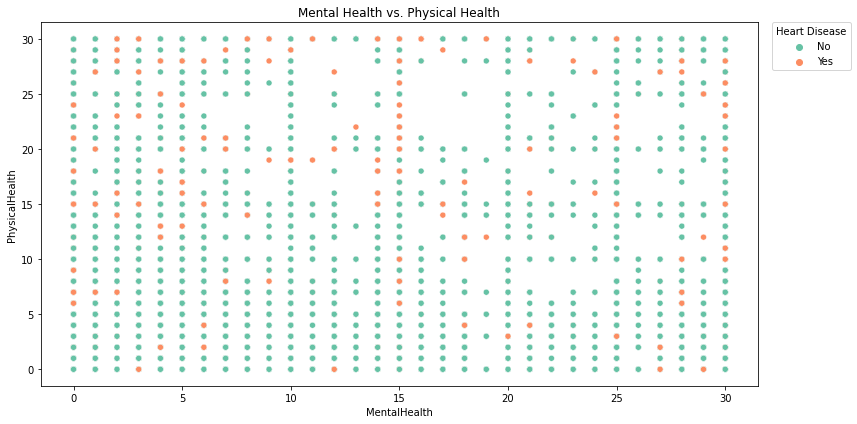

In [58]:
#Scatter Plot of Mental vs. Physical Health
fig, ax = plt.subplots(figsize=(12,6))
sns.scatterplot( x = df['MentalHealth'], y = df['PhysicalHealth'], hue = df['HeartDisease'], palette = color)

#Title
ax.set_title('Mental Health vs. Physical Health')

#Legend
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, title = 'Heart Disease')

plt.tight_layout()
plt.show()

#### Correlation of Numerical Values

<AxesSubplot:>

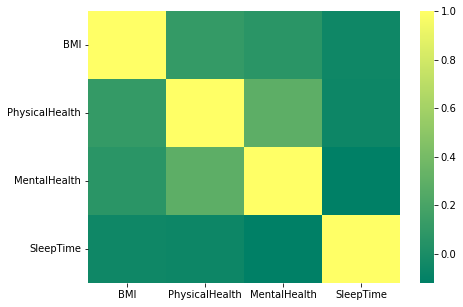

In [59]:
fig, ax = plt.subplots(figsize=(7,5))
sns.heatmap(df.corr(),cmap = 'summer')

### Feature Engineering

In [60]:
df_model = df.copy()

In [61]:
#Columns that are going to be converted into binary values 
cols_to_binary = ['HeartDisease','Smoking','AlcoholDrinking',
                  'DiffWalking','PhysicalActivity','Asthma','KidneyDisease','SkinCancer','Stroke']
#Replacing Yes:1 and No:0
for i in cols_to_binary:
    df_model = df_model.replace({i:{'Yes':1,'No':0}})

In [62]:
#One-Hot-Encoding

#Sex
# one_hot_1 = OneHotEncoder(handle_unknown='ignore')
# one_hot_df_1 = pd.DataFrame(one_hot_1.fit_transform(df_model[['Sex']]).toarray())
# one_hot_df_1.columns = ['isFemale','isMale']
# df_model = df_model.join(one_hot_df_1)
# df_model = df_model.drop(['Sex'],axis=1)
# df_model

#Race
# one_hot_2 = OneHotEncoder(handle_unknown='ignore')
# one_hot_df_2 = pd.DataFrame(one_hot_2.fit_transform(df_model[['Race']]).toarray())
# one_hot_df_2.columns = ['isNativeAmerican','isAsian','isBlack','isHispanic','isOther','isWhite']
# df_model = df_model.join(one_hot_df_2)
# df_model = df_model.drop(['Race'],axis=1)

In [63]:
#BMI Helper Function
# BMI < 18.5 --> Underweight 
# 18.5 < BMI < 24.9 --> Normal 
# 25 < BMI < 29.9 --> Overweight
# BMI > 30 --> Obese 

def bmi_category(bmi):
    if bmi > 30:
        return 'Obese'
    
    elif (bmi < 29.9) & (bmi > 25):
        return 'Overweight'
    
    elif (bmi < 24.9) & (bmi > 18.5):
        return 'Normal'
    
    else :
        return 'Underweight'

In [64]:
#Applying Helper Function
df_model['BMI_category'] = df_model['BMI'].apply(lambda x: bmi_category(x))

In [65]:
#Label Encoding 
#Age Category
le_1 = LabelEncoder()
df_model['AgeCategory_encoded'] = le_1.fit_transform(df_model['AgeCategory'])

#GenHealth
le_2 = LabelEncoder()
df_model['GenHealth_encoded'] = le_2.fit_transform(df_model['GenHealth'])

#BMI_category
le_3 = LabelEncoder()
df_model['BMI_encoded'] = le_3.fit_transform(df_model['BMI_category'])

#BMI_category
le_4 = LabelEncoder()
df_model['Diabetic_encoded'] = le_4.fit_transform(df_model['Diabetic'])

#Race
le_5 = LabelEncoder()
df_model['Race_encoded'] = le_5.fit_transform(df_model['Race'])

#Race
le_6 = LabelEncoder()
df_model['Gender_encoded'] = le_6.fit_transform(df_model['Sex'])

#Dropping features
df_model = df_model.drop(['BMI','BMI_category','GenHealth','AgeCategory','Diabetic','Race','Sex'],axis=1)

In [66]:
df_model.head().T

,0,1,2,3,4
HeartDisease,0.0,0.0,0.0,0.0,0.0
Smoking,1.0,0.0,1.0,0.0,0.0
AlcoholDrinking,0.0,0.0,0.0,0.0,0.0
Stroke,0.0,1.0,0.0,0.0,0.0
PhysicalHealth,3.0,0.0,20.0,0.0,28.0
MentalHealth,30.0,0.0,30.0,0.0,0.0
DiffWalking,0.0,0.0,0.0,0.0,1.0
PhysicalActivity,1.0,1.0,1.0,0.0,1.0
SleepTime,5.0,7.0,8.0,6.0,8.0
Asthma,1.0,0.0,1.0,0.0,0.0


### Building the Model

In [68]:
#Features 
X = df_model.loc[:, df_model.columns != 'HeartDisease']

#Target Variable
y = df_model['HeartDisease']

#### Split into Train & Test

In [69]:
#Splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25)

In [70]:
print('--- Shape of Training Set ---')
print('X_train :', X_train.shape)
print('y_train :', y_train.shape)
print('--- Shape of Test Set ---')
print('X_test :', X_test.shape)
print('y_test :', y_test.shape)

--- Shape of Training Set ---
X_train : (239846, 17)
y_train : (239846,)
--- Shape of Test Set ---
X_test : (79949, 17)
y_test : (79949,)


#### Logistic Regression

In [71]:
#Using a Logistic Regression Model 
LogReg_model = LogisticRegression()
LogReg_model.fit(X,y)

/Users/ksivanathan/opt/anaconda3/envs/heartDisease/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [72]:
#Getting feature importance values
# Not easy to interpret these values in Logistic Regression.
# The logit function in Logistic Regression bends our line of best fit to convert the classification problem into 
# a regression problem. 
# Using np.exp() to unlog these values to make the values more interpretable
feat_importance = np.exp(LogReg_model.coef_[0])

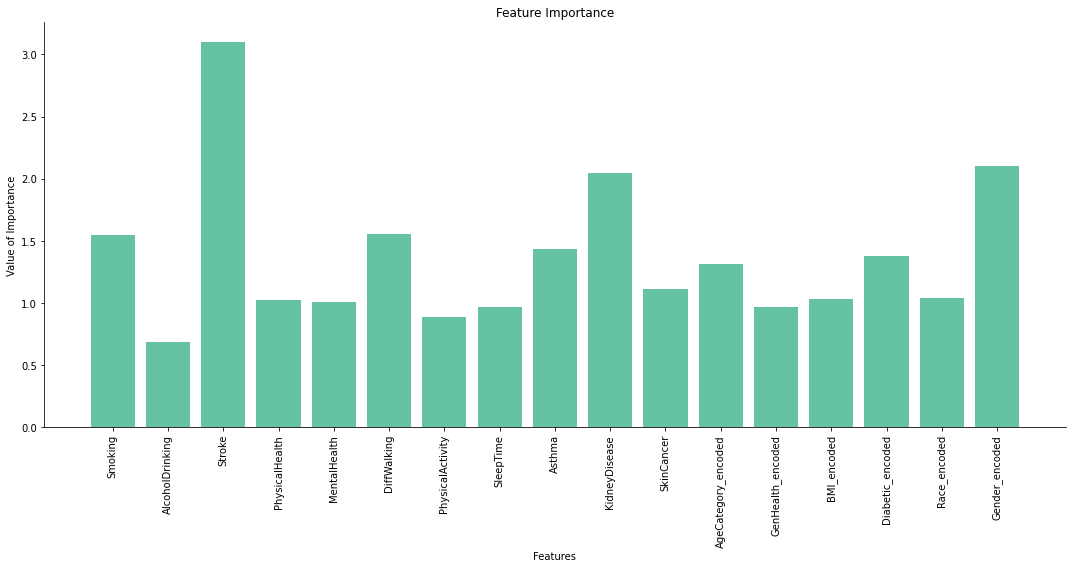

In [73]:
fig, ax = plt.subplots(figsize=(15,8))

#Plot
plt.bar(X.columns,feat_importance,color = '#66c2a5')

#X-Axis
plt.xticks(rotation=90)
plt.xlabel('Features')

#Y-Axis
plt.ylabel('Value of Importance')

#Title
plt.title('Feature Importance')

#Remove Spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()

plt.show()

- `AlcoholDrinking` is the least important feature. Followed by `PhysicalActivity`,`SleepTime`, and `GenHealth`. 
- The most important feature is `Stroke`, followed by `Gender_encoded` and `Smoking`. 
- `Smoking` has significantly more importance when compared to `AlcoholDrinking`.

In [74]:
#Randomized Grid Search

#Solver Type
solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag','saga']

#Max Iterations
max_iters = [20,40,60,80,100,200,400,600,800,1000]

#Random Grid
logReg_randomGrid = {'solver':solver,'max_iter':max_iters}
LogReg_RandomSearch = RandomizedSearchCV(estimator = LogReg_model, param_distributions = logReg_randomGrid)

In [75]:
%%time
LogReg_RandomSearch.fit(X_train,y_train)

/Users/ksivanathan/opt/anaconda3/envs/heartDisease/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/Users/ksivanathan/opt/anaconda3/envs/heartDisease/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/Users/ksivanathan/opt/anaconda3/envs/heartDisease/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/Users/ksivanathan/opt/anaconda3/envs/heartDisease/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/Users/ksivanathan/opt/anaconda3/envs/heartDisease/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to co

CPU times: user 1min 58s, sys: 1min 58s, total: 3min 56s
Wall time: 1min 13s


/Users/ksivanathan/opt/anaconda3/envs/heartDisease/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


RandomizedSearchCV(estimator=LogisticRegression(),
                   param_distributions={'max_iter': [20, 40, 60, 80, 100, 200,
                                                     400, 600, 800, 1000],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear', 'sag',
                                                   'saga']})

In [76]:
print('Best Parameters: ', LogReg_RandomSearch.best_params_)
print('Best Score: ', LogReg_RandomSearch.best_score_)

Best Parameters:  {'solver': 'newton-cg', 'max_iter': 20}
Best Score:  0.9150163034597952


#### Decision Tree Classifier 

In [77]:
#Using a Decision Tree Classifier
tree_model = DecisionTreeClassifier()
tree_model.fit(X,y)

DecisionTreeClassifier()

In [78]:
feat_importance2 = tree_model.feature_importances_

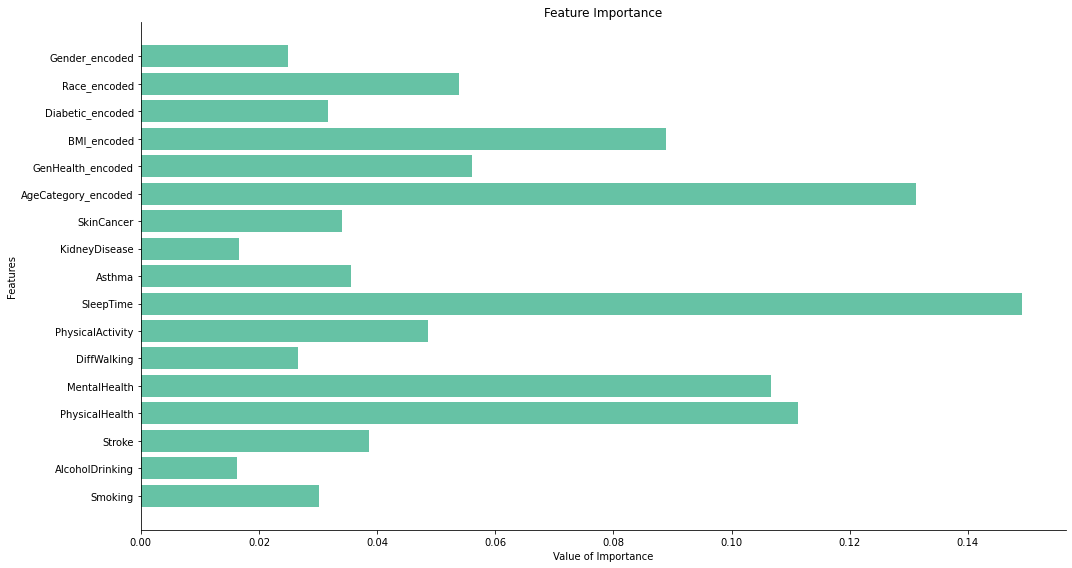

In [79]:
fig, ax = plt.subplots(figsize=(15,8))

#Plot
plt.barh(X.columns,feat_importance2, color = '#66c2a5')

#X-Axis
plt.xlabel('Value of Importance')

#Y-Axis
plt.ylabel('Features')

#Title
plt.title('Feature Importance')

#Remove Spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()

plt.show()

- `SleepTime` is the most important feature followed by `AgeCategory_encoded`, `PhysicalHealth`, and `MentalHealth`
- The least important features are the `KidneyDisease` and `AlcoholDrinking` columns.

In [80]:
#Paramter grid for Decision Tree
tree_randomGrid = {'criterion':['gini','entropy'],
                    'splitter':['best','random'],'max_features':['auto','sqrt','log2'],
                     'max_depth':range(1,10),'min_samples_split':range(1,10),'min_samples_leaf':range(1,5)}

#Randomized Search
tree_RandomSearch = RandomizedSearchCV(estimator = tree_model, param_distributions = tree_randomGrid,
                                          cv = 20, verbose = 1,n_jobs=-1)

In [81]:
%%time
tree_RandomSearch.fit(X_train,y_train)

Fitting 20 folds for each of 10 candidates, totalling 200 fits


/Users/ksivanathan/opt/anaconda3/envs/heartDisease/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
20 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/ksivanathan/opt/anaconda3/envs/heartDisease/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/ksivanathan/opt/anaconda3/envs/heartDisease/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 937, in fit
    super().fit(
  File "/Users/ksivanathan/opt/anaconda3/envs/heartDisease/lib/python3.9/site-packages/sk

CPU times: user 777 ms, sys: 710 ms, total: 1.49 s
Wall time: 14.7 s


RandomizedSearchCV(cv=20, estimator=DecisionTreeClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': range(1, 10),
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': range(1, 5),
                                        'min_samples_split': range(1, 10),
                                        'splitter': ['best', 'random']},
                   verbose=1)

In [82]:
print('Best Parameters: ', tree_RandomSearch.best_params_)
print('Best Score: ', tree_RandomSearch.best_score_)

Best Parameters:  {'splitter': 'random', 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 8, 'criterion': 'gini'}
Best Score:  0.915041325321136


I will be using the **RandomForest** classifier instead of the **Logistic Regression** classifier as it was much faster even though its accuracy was slightly less. 

#### Predictions

In [83]:
y_pred = tree_RandomSearch.predict(X_test)

In [84]:
print('Accuracy: ', accuracy_score(y_test,y_pred))
print('Precision: ', precision_score(y_test,y_pred))
print('Recall: ', recall_score(y_test,y_pred))
print('F1-Score: ', f1_score(y_test,y_pred))

Accuracy:  0.914533014796933
Precision:  0.4940828402366864
Recall:  0.024454532142334163
F1-Score:  0.046602483605413705


- A large number of predictions match the ground truth values, a high accuracy score indicates this. 
- Precision tests for how many predicted positive values is truly positive. We have a pretty low value for precision, which means that the classifier is returning a lot of false positives. In this case, classifying someone as someone with a Heart disease, when in fact they do not have a Heart disease. 
- The recall score represents the models ability to correctly predict positives out of actual positives. We have an above average score, which means that our model is able to for the most correctly predict if a person has Heart Disease. 
- F1-Score is a number between 0 & 1 which is the mean of precision and recall. 

In [85]:
file = open('decision_tree_classifier.pkl','wb')

#Dump info into that file
pickle.dump(tree_RandomSearch, file)